In [7]:
# [START import]
from __future__ import print_function
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import matplotlib.pyplot as plt
import numpy as np
# [END import]
import time
import pandas as pd

In [8]:
# [START solution_printer]
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))
    # [END solution_printer]

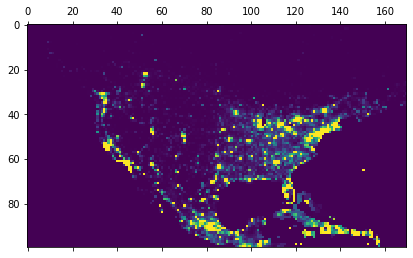

In [9]:
ascii_grid = np.loadtxt("/Users/shuffle_new/Desktop/Prelim/Modeling/Data/gpw-v4-population-density-adjusted-to-2015-unwpp-country-totals-rev11_2020_30_min_asc/gpw_v4_population_density_adjusted_to_2015_unwpp_country_totals_rev11_2020_30_min.asc", skiprows=6)
order_density = ascii_grid
order_density[order_density == -9999] = 0
order_density[order_density > 200] = 200
order_density = order_density[50:150, 80:250]
plt.matshow(order_density)

In [10]:
x_len = np.shape(order_density)[0]
y_len = np.shape(order_density)[1]

In [11]:
N_depot = 3

# depot_loc_ls = np.array([[40,60, 90],[40,100,80]])
depot_loc_ls = np.array([[20,90, 40],[20,80,140]])

In [20]:
def create_data_model(order_loc_ls, depot_loc_ls, order_demands):
    
    node_loc_ls = np.concatenate((depot_loc_ls, order_loc_ls),axis=1)
    N_order = np.shape(order_loc_ls)[1]
    N_depot = np.shape(depot_loc_ls)[1]

    distance_matrix = np.zeros((N_order+N_depot, N_order+N_depot))

    for i in range(N_order+N_depot):
        for j in range(i+1, N_order+N_depot):
    #         print(i,j)
            distance_matrix[i,j] = np.linalg.norm([node_loc_ls[0,i]-node_loc_ls[0,j],node_loc_ls[1,i]-node_loc_ls[1,j]])
            distance_matrix[j,i] = distance_matrix[i,j]


    node_demands = np.concatenate((np.zeros(N_depot),order_demands))
    """Stores the data for the problem."""
    data = {}
    data['node_loc_ls'] = node_loc_ls
    data['distance_matrix'] = distance_matrix
    # [START demands_capacities]
    data['demands'] = node_demands
    
    N_vehicle_each_depot = 5

    data['num_vehicles'] = N_depot * N_vehicle_each_depot
    data['vehicle_capacities'] = np.ones(data['num_vehicles'])*100
    # [END demands_capacities]
    
#     data['depot'] = 0
    data['starts'] = [0,1,2]*N_vehicle_each_depot
    data['ends'] = [0,1,2]*N_vehicle_each_depot
    return data
    # [END data_model]
# plt.matshow(create_data_model(order_loc_ls, depot_loc_ls, order_demands)['distance_matrix'])


# [START solution_printer]
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))
    # [END solution_printer]

# 正常情况

In [21]:
N_exper = 50

In [6]:

N_order_ls = np.random.normal(loc=50,scale=10,size=n_exper)

with progressbar.ProgressBar(max_value=N_exper) as bar:
    for i in range(len(N_order_ls)):
        bar.update(i)
        order_loc_ls = np.zeros((2,N_order))
        max_density = np.max(order_density)
        max_sample = 30000
        order_sampled = 0
        for i in range(max_sample):
            random_loc_x = np.random.rand()*x_len
            random_loc_y = np.random.rand()*y_len
            if order_density[int(random_loc_x), int(random_loc_y)]/max_density > np.random.rand():
                order_loc_ls[:,order_sampled] = [random_loc_x, random_loc_y]
                order_sampled += 1
                if order_sampled >= N_order:
                    break
        print(order_sampled)

        order_demands = np.random.randint(5,10,size=N_order)
        total_distance = 0
        
        for vehicle_id in range(data['num_vehicles']):
            index = routing.Start(vehicle_id)
            route_distance = 0
            node_ls = []
            while not routing.IsEnd(index):
                node_index = manager.IndexToNode(index)
                node_ls.append(node_index)
                previous_index = index
                index = solution.Value(routing.NextVar(index))
                route_distance += routing.GetArcCostForVehicle(
                        previous_index, index, vehicle_id)
            node_ls.append(manager.IndexToNode(index))
            
            
            total_distance += route_distance
            
            for i in range(N_depot):
                if i in node_ls:
                    depot_used = i
        #     route_x = data['node_loc_ls'][0,node_ls]
        #     route_y = data['node_loc_ls'][1,node_ls]
            
        #     plt.plot(route_x, route_y, c='C'+str(depot_used))

        # plt.scatter(order_loc_ls[0,:],order_loc_ls[1,:],s=1)
        # plt.scatter(depot_loc_ls[0,:],depot_loc_ls[1,:],s=50,c=['C'+str(i) for i in range(N_depot)])
        # plt.xlim(0,x_len)
        # plt.ylim(0,y_len)
        print('total distance: '+str(total_distance))
        print('total cost: '+str(C()))
        


100


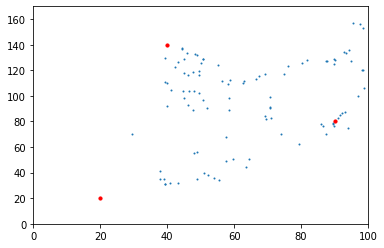

In [7]:
plt.scatter(order_loc_ls[0,:],order_loc_ls[1,:],s=1)
plt.scatter(depot_loc_ls[0,:],depot_loc_ls[1,:],s=10,c='r')
plt.xlim(0,x_len)
plt.ylim(0,y_len);

NameError: name 'data' is not defined

# 订单多了 随机筛选

In [11]:
N_depot = 3

# depot_loc_ls = np.array([[40,60, 90],[40,100,80]])
depot_loc_ls = np.array([[20,90, 40],[20,80,140]])

In [12]:
# 每天订单数量
N_total_order = 100
# 系统设定最多这么多
N_order = 50
# 200个 3s
# 300个 7s



order_loc_ls = np.zeros((2,N_total_order))
max_density = np.max(order_density)
max_sample = 30000
order_sampled = 0
for i in range(max_sample):
    random_loc_x = np.random.rand()*x_len
    random_loc_y = np.random.rand()*y_len
    if order_density[int(random_loc_x), int(random_loc_y)]/max_density > np.random.rand():
        order_loc_ls[:,order_sampled] = [random_loc_x, random_loc_y]
        order_sampled += 1
        if order_sampled >= N_total_order:
            break
print(order_sampled)
order_demands = np.random.randint(5,10,size=N_total_order)
saved_order = np.random.choice(N_total_order,N_order)
saved_order_demands = order_demands[saved_order]

100


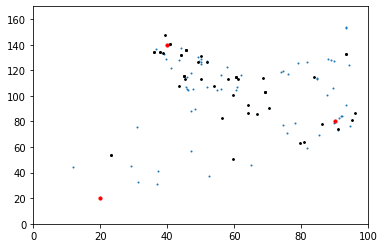

In [13]:
plt.scatter(order_loc_ls[0,:],order_loc_ls[1,:],s=1)
plt.scatter(depot_loc_ls[0,:],depot_loc_ls[1,:],s=10,c='r')


plt.xlim(0,x_len)
plt.ylim(0,y_len);

saved_order_loc_ls = order_loc_ls[:,saved_order]
plt.scatter(saved_order_loc_ls[0,:],saved_order_loc_ls[1,:],s=3,c='k')
plt.xlim(0,x_len)
plt.ylim(0,y_len);

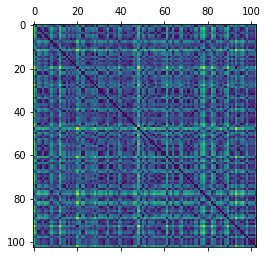

In [14]:
def create_data_model(order_loc_ls, depot_loc_ls, order_demands):
    
    node_loc_ls = np.concatenate((depot_loc_ls, order_loc_ls),axis=1)
    N_order = np.shape(order_loc_ls)[1]
    N_depot = np.shape(depot_loc_ls)[1]

    distance_matrix = np.zeros((N_order+N_depot, N_order+N_depot))

    for i in range(N_order+N_depot):
        for j in range(i+1, N_order+N_depot):
    #         print(i,j)
            distance_matrix[i,j] = np.linalg.norm([node_loc_ls[0,i]-node_loc_ls[0,j],node_loc_ls[1,i]-node_loc_ls[1,j]])
            distance_matrix[j,i] = distance_matrix[i,j]


    node_demands = np.concatenate((np.zeros(N_depot),order_demands))
    """Stores the data for the problem."""
    data = {}
    data['node_loc_ls'] = node_loc_ls
    data['distance_matrix'] = distance_matrix
    # [START demands_capacities]
    data['demands'] = node_demands
    
    N_vehicle_each_depot = 5

    data['num_vehicles'] = N_depot * N_vehicle_each_depot
    data['vehicle_capacities'] = np.ones(data['num_vehicles'])*50
    # [END demands_capacities]
    
#     data['depot'] = 0
    data['starts'] = [0,1,2]*N_vehicle_each_depot
    data['ends'] = [0,1,2]*N_vehicle_each_depot
    return data
    # [END data_model]
plt.matshow(create_data_model(order_loc_ls, depot_loc_ls, order_demands)['distance_matrix'])

In [15]:
"""Entry point of the program."""
time_start = time.time()
# Instantiate the data problem.
data = create_data_model(saved_order_loc_ls, depot_loc_ls, saved_order_demands)

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['starts'],
                                       data['ends'])

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)


# Create and register a transit callback.
# [START transit_callback]
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
# [END transit_callback]

# Define cost of each arc.
# [START arc_cost]
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# [END arc_cost]

# Add Capacity constraint.
# [START capacity_constraint]
def demand_callback(from_index):
    """Returns the demand of the node."""
    # Convert from routing variable Index to demands NodeIndex.
    from_node = manager.IndexToNode(from_index)
    return data['demands'][from_node]

demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)

routing.AddDimensionWithVehicleCapacity(
    demand_callback_index,
    0,  # null capacity slack
    data['vehicle_capacities'],  # vehicle maximum capacities
    True,  # start cumul to zero
    'Capacity')

# [END capacity_constraint]

# Setting first solution heuristic.
# [START parameters]
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.time_limit.seconds = 10
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.AUTOMATIC)


# search_parameters.local_search_metaheuristic = (
#     routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
# search_parameters.log_search = True
# [END parameters]

# Solve the problem.
# [START solve]
solution = routing.SolveWithParameters(search_parameters)
# [END solve]

# Print solution on console.
# [START print_solution]
# if solution:
#     print_solution(data, manager, routing, solution)
# [END print_solution]

time_end = time.time()

print('time consumed: '+str(time_end - time_start))
print("Solver status: ", routing.status())

time consumed: 0.28378796577453613
Solver status:  1


In [16]:
# [START solution_printer]
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))
    # [END solution_printer]

In [ ]:
v = 3
N_F = 10
S_F  = 80

S_P = 15
c_f = 1

def C():

cost_ls = [C(N_F, S_F, D, v, S_P, c_f) for D in D_ls]
plt.plot(D_ls, cost_ls)



In [17]:
total_distance = 0
for vehicle_id in range(data['num_vehicles']):
    index = routing.Start(vehicle_id)
    route_distance = 0
    node_ls = []
    while not routing.IsEnd(index):
        node_index = manager.IndexToNode(index)
        node_ls.append(node_index)
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
    node_ls.append(manager.IndexToNode(index))
    
    
    total_distance += route_distance
    
    for i in range(N_depot):
        if i in node_ls:
            depot_used = i
    route_x = data['node_loc_ls'][0,node_ls]
    route_y = data['node_loc_ls'][1,node_ls]
    
    plt.plot(route_x, route_y, c='C'+str(depot_used))

plt.scatter(order_loc_ls[0,:],order_loc_ls[1,:],s=1)
plt.scatter(depot_loc_ls[0,:],depot_loc_ls[1,:],s=50,c=['C'+str(i) for i in range(N_depot)])
plt.xlim(0,x_len)
plt.ylim(0,y_len)
print('total distance: '+str(total_distance))

cost = C(N_F, S_F, total_distance, v, S_P, c_f) 
print('cost: '+str(cost))

total distance: 623


NameError: name 'C' is not defined

# 订单多了，接T_1天，拒绝T_2天，用T_1+T_2天配送

200


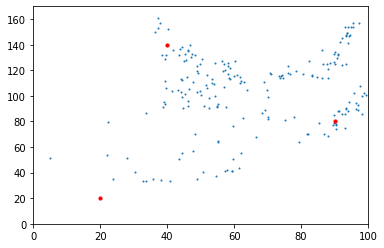

In [258]:
N_depot = 3

# depot_loc_ls = np.array([[40,60, 90],[40,100,80]])
depot_loc_ls = np.array([[20,90, 40],[20,80,140]])

T_1 = 2
T_2 = 1

N_order_each_day = 100
N_order = N_order_each_day * T_1
# 200个 3s
# 300个 7s
# 400个 13s



order_loc_ls = np.zeros((2,N_order))
max_density = np.max(order_density)
max_sample = 30000
order_sampled = 0
for i in range(max_sample):
    random_loc_x = np.random.rand()*x_len
    random_loc_y = np.random.rand()*y_len
    if order_density[int(random_loc_x), int(random_loc_y)]/max_density > np.random.rand():
        order_loc_ls[:,order_sampled] = [random_loc_x, random_loc_y]
        order_sampled += 1
        if order_sampled >= N_order:
            break
print(order_sampled)

order_demands = np.random.randint(5,10,size=N_order)

plt.scatter(order_loc_ls[0,:],order_loc_ls[1,:],s=1)
plt.scatter(depot_loc_ls[0,:],depot_loc_ls[1,:],s=10,c='r')
plt.xlim(0,x_len)
plt.ylim(0,y_len);

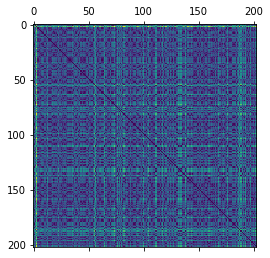

In [239]:
def create_data_model(order_loc_ls, depot_loc_ls, order_demands):
    
    node_loc_ls = np.concatenate((depot_loc_ls, order_loc_ls),axis=1)
    N_order = np.shape(order_loc_ls)[1]
    N_depot = np.shape(depot_loc_ls)[1]

    distance_matrix = np.zeros((N_order+N_depot, N_order+N_depot))

    for i in range(N_order+N_depot):
        for j in range(i+1, N_order+N_depot):
    #         print(i,j)
            distance_matrix[i,j] = np.linalg.norm([node_loc_ls[0,i]-node_loc_ls[0,j],node_loc_ls[1,i]-node_loc_ls[1,j]])
            distance_matrix[j,i] = distance_matrix[i,j]


    node_demands = np.concatenate((np.zeros(N_depot),order_demands))
    """Stores the data for the problem."""
    data = {}
    data['node_loc_ls'] = node_loc_ls
    data['distance_matrix'] = distance_matrix
    # [START demands_capacities]
    data['demands'] = node_demands
    
    N_vehicle_each_depot = 5

    data['num_vehicles'] = N_depot * N_vehicle_each_depot
    data['vehicle_capacities'] = np.ones(data['num_vehicles'])*200
    # [END demands_capacities]
    
#     data['depot'] = 0
    data['starts'] = [0,1,2]*N_vehicle_each_depot
    data['ends'] = [0,1,2]*N_vehicle_each_depot
    return data
    # [END data_model]
plt.matshow(create_data_model(order_loc_ls, depot_loc_ls, order_demands)['distance_matrix'])

In [240]:
"""Entry point of the program."""
time_start = time.time()
# Instantiate the data problem.
data = create_data_model(order_loc_ls, depot_loc_ls, order_demands)

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['starts'],
                                       data['ends'])

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)


# Create and register a transit callback.
# [START transit_callback]
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
# [END transit_callback]

# Define cost of each arc.
# [START arc_cost]
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# [END arc_cost]

# Add Capacity constraint.
# [START capacity_constraint]
def demand_callback(from_index):
    """Returns the demand of the node."""
    # Convert from routing variable Index to demands NodeIndex.
    from_node = manager.IndexToNode(from_index)
    return data['demands'][from_node]

demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)

routing.AddDimensionWithVehicleCapacity(
    demand_callback_index,
    0,  # null capacity slack
    data['vehicle_capacities'],  # vehicle maximum capacities
    True,  # start cumul to zero
    'Capacity')

# [END capacity_constraint]

# Setting first solution heuristic.
# [START parameters]
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.time_limit.seconds = 200
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.AUTOMATIC)


# search_parameters.local_search_metaheuristic = (
#     routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
# search_parameters.log_search = True
# [END parameters]

# Solve the problem.
# [START solve]
solution = routing.SolveWithParameters(search_parameters)
# [END solve]

# Print solution on console.
# [START print_solution]
if solution:
    print_solution(data, manager, routing, solution)
# [END print_solution]

time_end = time.time()

print('time consumed: '+str(time_end - time_start))
print("Solver status: ", routing.status())

# Value	Description
# 0	ROUTING_NOT_SOLVED: Problem not solved yet.
# 1	ROUTING_SUCCESS: Problem solved successfully.
# 2	ROUTING_FAIL: No solution found to the problem.
# 3	ROUTING_FAIL_TIMEOUT: Time limit reached before finding a solution.
# 4	ROUTING_INVALID: Model, model parameters, or flags are not valid.

Route for vehicle 0:
 0 Load(0.0) ->  3 Load(5.0) ->  0 Load(5.0)
Distance of the route: 52m
Load of the route: 5.0

Route for vehicle 1:
 1 Load(0.0) ->  49 Load(6.0) ->  38 Load(14.0) ->  18 Load(19.0) ->  12 Load(28.0) ->  142 Load(37.0) ->  95 Load(46.0) ->  40 Load(53.0) ->  94 Load(60.0) ->  23 Load(68.0) ->  172 Load(76.0) ->  140 Load(85.0) ->  202 Load(94.0) ->  82 Load(103.0) ->  104 Load(109.0) ->  55 Load(114.0) ->  73 Load(122.0) ->  143 Load(128.0) ->  159 Load(136.0) ->  199 Load(143.0) ->  120 Load(151.0) ->  79 Load(159.0) ->  61 Load(167.0) ->  36 Load(174.0) ->  60 Load(182.0) ->  67 Load(189.0) ->  27 Load(197.0) ->  1 Load(197.0)
Distance of the route: 163m
Load of the route: 197.0

Route for vehicle 2:
 2 Load(0.0) ->  2 Load(0.0)
Distance of the route: 0m
Load of the route: 0.0

Route for vehicle 3:
 0 Load(0.0) ->  0 Load(0.0)
Distance of the route: 0m
Load of the route: 0.0

Route for vehicle 4:
 1 Load(0.0) ->  1 Load(0.0)
Distance of the route: 0m
Load of the

In [242]:
# vehicle_route: 每个vehicle走的route
vehicle_route = {}

for vehicle_id in range(data['num_vehicles']):
    this_vehicle_distance = 0
    this_vehicle_node_ls = []
    index = routing.Start(vehicle_id)
    while not routing.IsEnd(index):
        node_index = manager.IndexToNode(index)
        this_vehicle_node_ls.append(node_index)
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        this_vehicle_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
    this_vehicle_node_ls.append(manager.IndexToNode(index))
    if this_vehicle_distance != 0:
        vehicle_route[vehicle_id] = {'route':np.array(this_vehicle_node_ls), 'distance':this_vehicle_distance}

n_route = len(vehicle_route)
L_i = [vehicle_route[x]['distance'] for x in vehicle_route]

In [260]:
# bin packing problem

import cvxpy as cp

y = cp.Variable((n_route,T_1+T_2),boolean=True)
D_t = cp.Variable(T_1+T_2)
C_t = cp.Variable(T_1+T_2)

constraints = []
for i in range(n_route):
    constraints.append(cp.sum(y[i,:]) == 1)

for t in range(T_1+T_2):
    constraints.append(D_t[t] == cp.sum(y[:,t]*L_i))

for t in range(T_1 + T_2):
    constraints.append(C_t[t] >= N_F*S_F + cp.maximum(0, (D_t[t]/v - 8*N_F))*S_P + D_t[t]*c_f)

objective = cp.Minimize(cp.sum(C_t))
prob = cp.Problem(objective, constraints)
result = prob.solve()

for i in range(T_1+T_2):
    print('at day {} part time work for {}'.format(i, max(0, D_t.value[i]/v - 8*N_F)))
print('total cost: '+str(result))

at day 0 part time work for 60.66666666666663
at day 1 part time work for 50.33333333333334
at day 2 part time work for 14.666666666666686
total cost: 5382.0


total distance: 1097


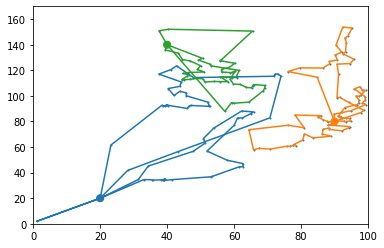

In [247]:
total_distance = 0
for vehicle_id in range(data['num_vehicles']):
    index = routing.Start(vehicle_id)
    route_distance = 0
    node_ls = []
    while not routing.IsEnd(index):
        node_index = manager.IndexToNode(index)
        node_ls.append(node_index)
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
    node_ls.append(manager.IndexToNode(index))
    
    
    total_distance += route_distance
    
    for i in range(N_depot):
        if i in node_ls:
            depot_used = i
    route_x = data['node_loc_ls'][0,node_ls]
    route_y = data['node_loc_ls'][1,node_ls]
    
    plt.plot(route_x, route_y, c='C'+str(depot_used))

plt.scatter(order_loc_ls[0,:],order_loc_ls[1,:],s=1)
plt.scatter(depot_loc_ls[0,:],depot_loc_ls[1,:],s=50,c=['C'+str(i) for i in range(N_depot)])
plt.xlim(0,x_len)
plt.ylim(0,y_len)
print('total distance: '+str(total_distance))

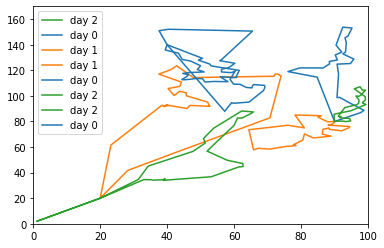

In [252]:
for i in range(n_route):
    vehicle_id = list(vehicle_route.keys())[i]
    node_ls = vehicle_route[vehicle_id]['route']
    route_x = data['node_loc_ls'][0,node_ls]
    route_y = data['node_loc_ls'][1,node_ls]
    day = np.where(np.abs(y.value[i,:]-1) < 1e-3)[0][0]
    vehicle_route[vehicle_id]['day'] = day
    plt.plot(route_x, route_y, c='C'+str(day),label='day '+str(day))
plt.xlim(0, x_len)
plt.ylim(0, y_len)
plt.legend()

# 综合实验